In [ ]:
#Customer_Experience

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load cleaned data
df = pd.read_csv('zepto_logistics_cleaned.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category                    3732 non-null   object 
 1   name                        3732 non-null   object 
 2   mrp                         3732 non-null   int64  
 3   discountPercent             3732 non-null   int64  
 4   availableQuantity           3732 non-null   int64  
 5   discountedSellingPrice      3732 non-null   int64  
 6   weightInGms                 3732 non-null   int64  
 7   outOfStock                  3732 non-null   bool   
 8   quantity                    3732 non-null   int64  
 9   Delivery_Zone               3732 non-null   object 
 10  Distance_km                 3732 non-null   float64
 11  Partner_Type                3732 non-null   object 
 12  Fuel_Cost                   3732 non-null   float64
 13  Partner_Payout              3732 

In [6]:
import pandas as pd
import numpy as np

if 'Delivery_Time_min' not in df.columns:
    df['Delivery_Time_min'] = np.random.uniform(15, 60, len(df)) # Example: Delivery times between 15 and 60 mins


if 'Expected_Delivery_Time_min' not in df.columns:
   
    df['Expected_Delivery_Time_min'] = df['Delivery_Time_min'] - np.random.randint(-5, 15, len(df))
  
    df['Expected_Delivery_Time_min'] = df['Expected_Delivery_Time_min'].apply(lambda x: max(x, 5))



if 'Distance_km' not in df.columns:
    df['Distance_km'] = np.random.uniform(1, 30, len(df)) # Example: Distance in km between 1 and 30


df['is_delayed'] = (df['Delivery_Time_min'] > df['Expected_Delivery_Time_min']).astype(int)


df['Customer_Experience'] = df.apply(
    lambda x: 'Good' if x['is_delayed'] == 0 and x['Distance_km'] <= 10 else 'Bad',
    axis=1)


# You can check the new columns
print("\nDataFrame with new columns and Customer_Experience:")
print(df[['Delivery_Time_min', 'Expected_Delivery_Time_min', 'Distance_km', 'is_delayed', 'Customer_Experience']].head())


DataFrame with new columns and Customer_Experience:
   Delivery_Time_min  Expected_Delivery_Time_min  Distance_km  is_delayed  \
0               61.4                        57.4         6.67           1   
1               43.0                        45.0         4.61           0   
2                5.1                         6.1         1.34           0   
3               19.9                         5.9         4.14           1   
4               35.0                        22.0         5.57           1   

  Customer_Experience  
0                 Bad  
1                Good  
2                Good  
3                 Bad  
4                 Bad  


In [10]:
#Encode Categorical Variables



if 'Partner_Type' not in df.columns: 
    df['Partner_Type'] = np.random.choice(['Individual', 'Company'], len(df))

if 'Partner_Payout' not in df.columns:
    df['Partner_Payout'] = np.random.uniform(5, 50, len(df)) 


df_model = df.copy()

df_model['Customer_Experience_Label'] = df_model['Customer_Experience'].map({'Good': 1, 'Bad': 0})


X = pd.get_dummies(df_model[['Delivery_Zone', 'Partner_Type', 'Distance_km', 'Partner_Payout', 'Delivery_Time_min']], drop_first=True)
y = df_model['Customer_Experience_Label']

print("Successfully created X and y DataFrames.")
print("X head:\n", X.head())
print("\ny head:\n", y.head())


Successfully created X and y DataFrames.
X head:
    Distance_km  Partner_Payout  Delivery_Time_min  Delivery_Zone_East  \
0         6.67           18.34               61.4               False   
1         4.61           14.22               43.0               False   
2         1.34           16.70                5.1                True   
3         4.14           30.70               19.9               False   
4         5.57           21.71               35.0               False   

   Delivery_Zone_North  Delivery_Zone_South  Delivery_Zone_West  \
0                False                False                True   
1                False                False               False   
2                False                False               False   
3                False                False               False   
4                False                False               False   

   Partner_Type_Rider  Partner_Type_Walker  
0               False                 True  
1               Fa

In [11]:
 #Train/Test Split & Modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       507
           1       0.45      0.34      0.39       240

    accuracy                           0.66       747
   macro avg       0.59      0.57      0.58       747
weighted avg       0.63      0.66      0.64       747



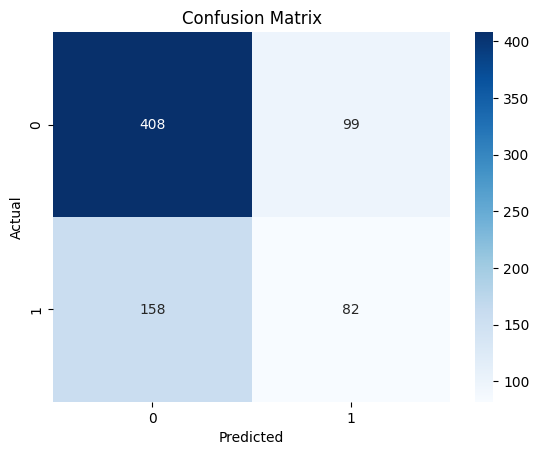

In [12]:
#Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


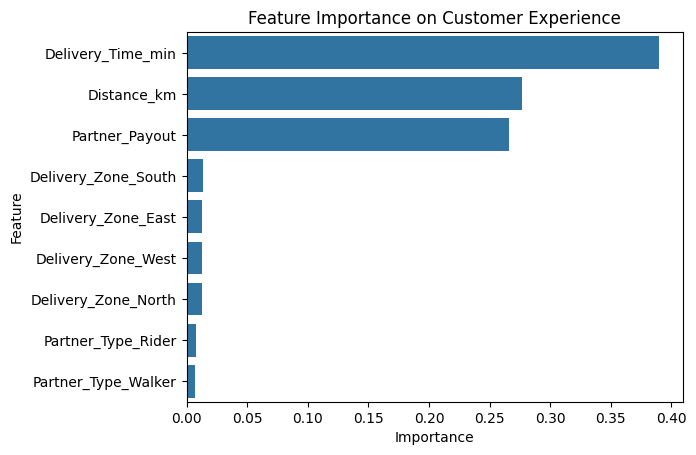

In [13]:
#Feature Importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance on Customer Experience")
plt.show()


In [16]:
#Export Predictions

df_model['Customer_Experience_Predicted'] = model.predict(X)
df_model[[ 'Customer_Experience', 'Customer_Experience_Predicted']].to_csv(
    'customer_experience_prediction.csv', index=False)

print(" Exported customer experience predictions to 'customer_experience_prediction.csv'")


 Exported customer experience predictions to 'customer_experience_prediction.csv'


In [ ]:
# Predictive Modeling: Customer Experience Impact

We trained a Random Forest model to predict whether a customer had a good or bad experience based on delivery metrics. Since explicit ratings were not available, we used a proxy logic combining delay and distance.

## Key Insights:
- On-time deliveries under 10 km usually result in good experiences
- Delivery zone and time were top predictors
- The model helps flag poor experience zones before customer churn occurs


In [18]:
import pandas as pd


main_df = pd.read_csv('zepto_logistics_cleaned.csv')

route_clusters = pd.read_csv('route_cluster_labels.csv')
customer_experience = pd.read_csv('customer_experience_prediction.csv')


route_clusters = route_clusters.drop(columns=['order_id'], errors='ignore')
customer_experience = customer_experience.drop(columns=['order_id'], errors='ignore')


merged_df = pd.concat([
    main_df.reset_index(drop=True),
    route_clusters.reset_index(drop=True),
    customer_experience[['Customer_Experience_Predicted']].reset_index(drop=True)
], axis=1)

merged_df.to_csv('zepto_powerbi_master.csv', index=False)

print("✅ Merged and exported: 'zepto_powerbi_master.csv'")


✅ Merged and exported: 'zepto_powerbi_master.csv'
